# Employee Absenteeism

In [1]:
#   LOADING THE REQUIRED LIBRARIES
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#   CHANGE AND GET THE WORKING DIRECTORY
os.chdir("D:\project2")
os.getcwd()

'D:\\project2'

In [3]:
# LOADING THE DATA
emp_data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [4]:
# GETTING TYPE OF THE DATASETS

type(emp_data)

pandas.core.frame.DataFrame

In [5]:
# OVERVIEW OF THE TRAIN AND TEST DATASETS


emp_data.head(15)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [6]:
#Getting shapeof the datatype
emp_data.shape


(740, 21)

In [7]:
# DATATYPES OF THE ALL THE VARIABLES


emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [8]:
# Number of Unique values present in each variable
emp_data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [9]:
#Seprating categorical variable names
cat_var = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

In [10]:
# Converting Variable into "category " data type
for i in cat_var:
    emp_data.loc[:,i] = emp_data.loc[:,i].astype('category')

In [11]:
# DATATYPES OF THE ALL THE VARIABLES
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null category
Reason for absence                 737 non-null category
Month of absence                   739 non-null category
Day of the week                    740 non-null category
Seasons                            740 non-null category
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null category
Education                          730 non-null category
Son                                734 non-null category
Social drinker                     737 non-null category
Social smoker                      736 non-nul

# Missing Value Analysis

In [12]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(emp_data.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(emp_data))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

In [13]:
#Variable wise missing value percentage 
missing_val

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [14]:
emp_data['Body mass index'].loc[70]

32.0

In [15]:
#imputation method
#emp_data['Body mass index'].loc[70]=32
#Actual value = 32
#Mean =26.6768
#Median = 25.0
#KNN = 29.35

#create missing value
#emp_data['Body mass index'].loc[70] = np.nan

In [16]:
emp_data['Body mass index'].loc[70]

32.0

In [17]:
#Impute with mean
#emp_data['Body mass index']= emp_data['Body mass index'].fillna(emp_data['Body mass index'].mean())

In [18]:
#Impute with median
#emp_data['Body mass index']= emp_data['Body mass index'].fillna(emp_data['Body mass index'].median())

In [19]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, emp_data.shape[1]):
    #print(i)
    if(emp_data.iloc[:,i].dtypes == 'object'):
        emp_data.iloc[:,i] = pd.Categorical(emp_data.iloc[:,i])
        #print(emp_data[[i]])
        emp_data.iloc[:,i] = emp_data.iloc[:,i].cat.codes 
        emp_data.iloc[:,i] = emp_data.iloc[:,i].astype('object')
        
        lis.append(emp_data.columns[i])
        

In [20]:
#replace -1 with NA to impute
for i in range(0, emp_data.shape[1]):
    emp_data.iloc[:,i] = emp_data.iloc[:,i].replace(-1, np.nan) 

In [21]:
#Apply KNN imputation algorithm
emp_data = pd.DataFrame(KNN(k = 3).fit_transform(emp_data), columns = emp_data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.138
Imputing row 101/740 with 1 missing, elapsed time: 0.140
Imputing row 201/740 with 0 missing, elapsed time: 0.141
Imputing row 301/740 with 0 missing, elapsed time: 0.142
Imputing row 401/740 with 0 missing, elapsed time: 0.143
Imputing row 501/740 with 0 missing, elapsed time: 0.144
Imputing row 601/740 with 0 missing, elapsed time: 0.144
Imputing row 701/740 with 0 missing, elapsed time: 0.145


In [22]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null float64
Reason for absence                 740 non-null float64
Month of absence                   740 non-null float64
Day of the week                    740 non-null float64
Seasons                            740 non-null float64
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null float64
Education                          740 non-null float64
Son                                740 non-null float64
Social drinker                     740 non-null float64
Social smoker                      740 non-null float64

In [23]:
#Convert into proper datatypes
for i in cat_var:
    emp_data.loc[:,i] = emp_data.loc[:,i].round()
    emp_data.loc[:,i] = emp_data.loc[:,i].astype('category')

   
    

In [24]:
missing_val = pd.DataFrame(emp_data.isnull().sum())

In [25]:
missing_val

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average/day,0


# Outlier Analysis

In [26]:
#separating continuous variable of the dataset
cont_var = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


Text(0, 0.5, 'Values')

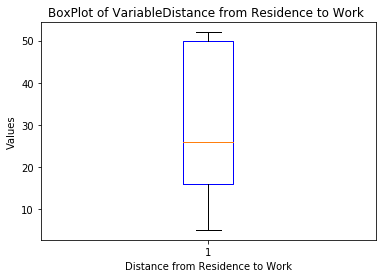

In [27]:
# Box plot to detect the outliers of variable "Distance from Residence to Work"
bp =plt.boxplot(emp_data['Distance from Residence to Work'])
plt.setp(bp['boxes'], color='blue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red')
plt.xlabel("Distance from Residence to Work")
plt.title("BoxPlot of VariableDistance from Residence to Work ")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

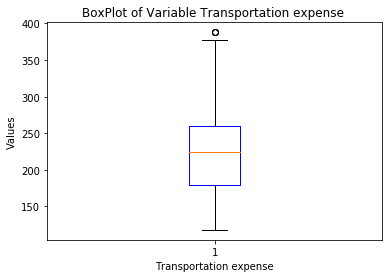

In [28]:
# Box plot to detect the outliers of variable "Transportation expense"
bp =plt.boxplot(emp_data['Transportation expense'])
plt.setp(bp['boxes'], color='blue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red')
plt.xlabel("Transportation expense")
plt.title("BoxPlot of Variable Transportation expense ")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

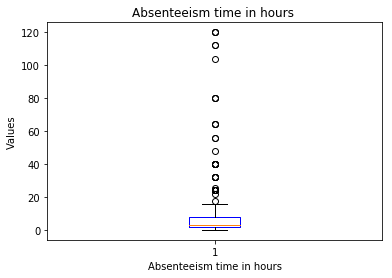

In [29]:
# Box plot to detect the outliers of variable "Absenteeism time in hours"
bp =plt.boxplot(emp_data['Absenteeism time in hours'])
plt.setp(bp['boxes'], color='blue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red')
plt.xlabel("Absenteeism time in hours")
plt.title("Absenteeism time in hours ")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

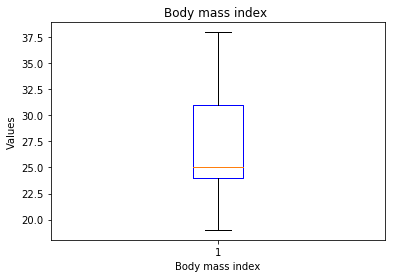

In [30]:
# Box plot to detect the outliers of variable "Body mass index"
bp =plt.boxplot(emp_data['Body mass index'])
plt.setp(bp['boxes'], color='blue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red')
plt.xlabel("Body mass index")
plt.title("Body mass index ")
plt.ylabel('Values')

In [31]:
cont_var

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [32]:
# DETECTING OUTLIERS AND REPLACING IT WITH NA(NULL VALUE)


for i in cont_var:
    print(i)
    q75, q25 = np.percentile(emp_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    # #Replace with NA
    emp_data.loc[emp_data[i] < min,i]=np.nan
    emp_data.loc[emp_data[i] > max,i]=np.nan

Distance from Residence to Work
-35.0
101.0
Service time
-1.5
26.5
Age
17.5
53.5
Work load Average/day 
183688.0
345552.0
Transportation expense
57.5
381.5
Hit target
87.0
103.0
Weight
39.0
119.0
Height
164.5
176.5
Body mass index
13.5
41.5
Absenteeism time in hours
-7.0
17.0


In [33]:
# AFTER REPLACING OUTLIERS WITH NA GETTING THE MISSING VALUES INTO THE DATASETS


missing_val = pd.DataFrame(emp_data.isnull().sum())


In [34]:
missing_val

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,3
Distance from Residence to Work,0
Service time,5
Age,8
Work load Average/day,31


In [35]:
#Apply KNN imputation algorithm
emp_data = pd.DataFrame(KNN(k = 3).fit_transform(emp_data), columns = emp_data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.139
Imputing row 101/740 with 1 missing, elapsed time: 0.141
Imputing row 201/740 with 0 missing, elapsed time: 0.142
Imputing row 301/740 with 0 missing, elapsed time: 0.144
Imputing row 401/740 with 0 missing, elapsed time: 0.145
Imputing row 501/740 with 0 missing, elapsed time: 0.146
Imputing row 601/740 with 0 missing, elapsed time: 0.147
Imputing row 701/740 with 0 missing, elapsed time: 0.149


In [36]:
#Convert into proper datatypes
for i in cat_var:
    emp_data.loc[:,i] = emp_data.loc[:,i].round()
    emp_data.loc[:,i] = emp_data.loc[:,i].astype('category')

   

# Feature Selection

In [37]:
##Correlation analysis
#Correlation plot
my_corr = emp_data.loc[:,cont_var]

[]

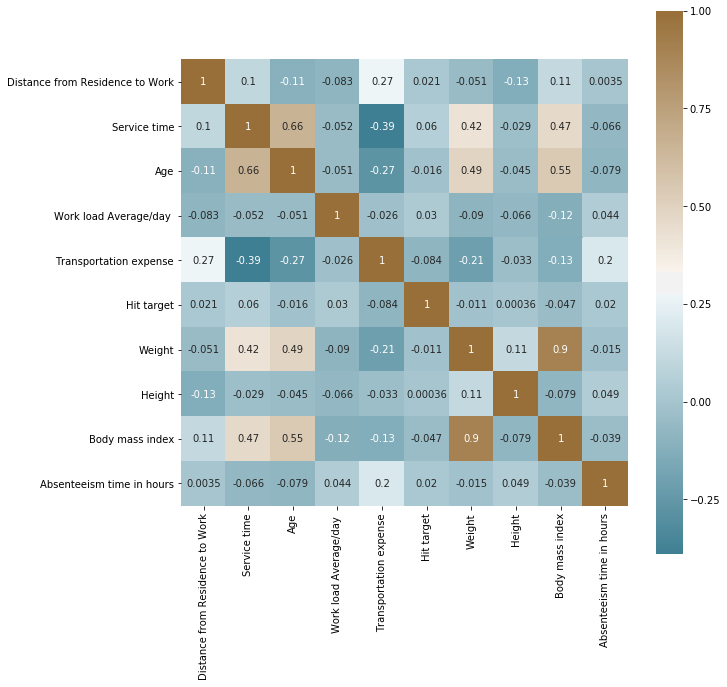

In [38]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = my_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [39]:
#loop for ANOVA test Since the target variable is continuous
for i in cat_var:
    f, p = stats.f_oneway(emp_data[i], emp_data["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 1.6080240866383493e-172
P value for variable Reason for absence is 3.173320358461362e-274
P value for variable Month of absence is 7.880940616980664e-27
P value for variable Day of the week is 0.000518407960423421
P value for variable Seasons is 3.8306652977797314e-42
P value for variable Disciplinary failure is 1.127793773112876e-193
P value for variable Education is 1.6101418171707504e-110
P value for variable Social drinker is 1.404261957723593e-157
P value for variable Social smoker is 4.201165033844094e-192
P value for variable Pet is 1.0050301293032782e-132
P value for variable Son is 7.584418573330562e-121


In [40]:
# DELETING THE VARIABLES 

emp_data = emp_data.drop(['Weight'], axis=1)
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
ID                                 740 non-null category
Reason for absence                 740 non-null category
Month of absence                   740 non-null category
Day of the week                    740 non-null category
Seasons                            740 non-null category
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null category
Education                          740 non-null category
Son                                740 non-null category
Social drinker                     740 non-null category
Social smoker                      740 non-nul

# Feature Scaling

In [41]:
# Seprating categorical and continuous variable after feature selection
cat_var = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']
cont_var = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [42]:
cont_var

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

(array([  6., 144.,  59.,  39., 181.,  21.,  37.,  42.,   7.,   2., 202.]),
 array([ 5.        ,  9.27272727, 13.54545455, 17.81818182, 22.09090909,
        26.36363636, 30.63636364, 34.90909091, 39.18181818, 43.45454545,
        47.72727273, 52.        ]),
 <a list of 11 Patch objects>)

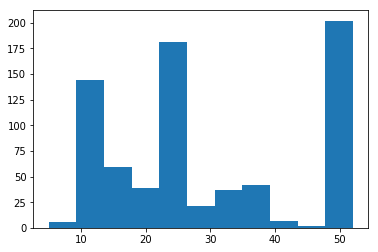

In [43]:
# Plotting histogram to overview data distribution of the continuous variable
#Histogram of "Distance from residence to work"
%matplotlib inline     
plt.hist(emp_data['Distance from Residence to Work'], bins='auto')

(array([ 21.,  36.,  20.,  83.,  84.,  79., 122.,  28.,  56.,  51.,  23.,
         61.,  16.,   0.,  31.,  29.]),
 array([205917. , 214500.5, 223084. , 231667.5, 240251. , 248834.5,
        257418. , 266001.5, 274585. , 283168.5, 291752. , 300335.5,
        308919. , 317502.5, 326086. , 334669.5, 343253. ]),
 <a list of 16 Patch objects>)

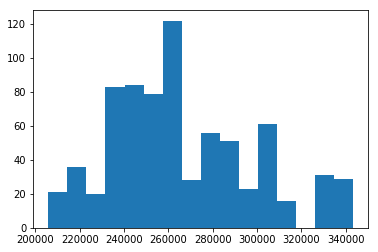

In [44]:
#Histogram of "Distance from Work load Average/dayk"
%matplotlib inline     
plt.hist(emp_data['Work load Average/day '], bins='auto')

(array([ 46.,  23., 107.,  87., 127.,  24.,  84.,  39., 170.,   6.,   3.,
          5.,  19.]),
 array([19.        , 20.46153846, 21.92307692, 23.38461538, 24.84615385,
        26.30769231, 27.76923077, 29.23076923, 30.69230769, 32.15384615,
        33.61538462, 35.07692308, 36.53846154, 38.        ]),
 <a list of 13 Patch objects>)

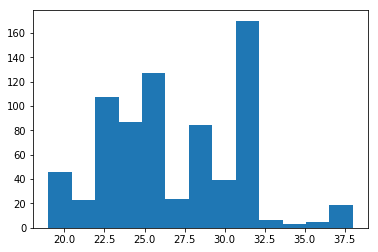

In [45]:
#Histogram of "Distance from "Body mass index"
%matplotlib inline     
plt.hist(emp_data['Body mass index'], bins='auto')

(array([126., 160., 123.,  75.,  16.,   9., 209.,   0.,   0.,   2.,   0.,
          1.,  19.]),
 array([ 0.        ,  1.23076923,  2.46153846,  3.69230769,  4.92307692,
         6.15384615,  7.38461538,  8.61538462,  9.84615385, 11.07692308,
        12.30769231, 13.53846154, 14.76923077, 16.        ]),
 <a list of 13 Patch objects>)

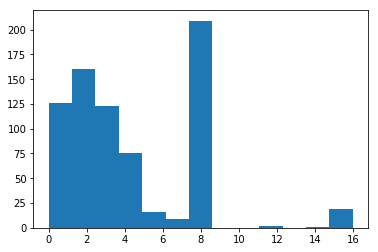

In [46]:
#Histogram of "Distance from "Absenteeism time in hours"
%matplotlib inline     
plt.hist(emp_data['Absenteeism time in hours'], bins='auto')

In [47]:
#Nomalisation method to scale the data
for i in cont_var:
    if i == 'Absenteeism time in hours':
        continue
    emp_data[i] = (emp_data[i] - emp_data[i].min())/(emp_data[i].max()-emp_data[i].min())

In [48]:
emp1=emp_data.copy()

# Get dummy variables for categorical variables
emp_data = pd.get_dummies(data = emp_data, columns = cat_var)
emp_data = emp_data.drop(['Absenteeism time in hours'], axis=1)
emp_data=emp_data.join(emp1['Absenteeism time in hours'])

In [49]:
emp_data.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,ID_1.0,ID_2.0,...,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0,Absenteeism time in hours
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0,0,...,0,0,0,0,0,0,1,0,0,4.0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.500001,0.631579,0,0,...,0,0,0,0,0,1,0,0,0,0.0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.500000,0.631579,0,0,...,0,0,0,0,1,0,0,0,0,2.0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.300000,0.263158,0,0,...,0,0,0,0,0,0,1,0,0,4.0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0,0,...,0,0,0,0,0,0,1,0,0,2.0


# Sampling Dataset

In [50]:
#Splitting the dataset into train and test dataset
train, test = train_test_split(emp_data, test_size=0.2)

# Model Building

# Decision Tree For Regression

In [51]:
##decision tree for regression
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor


# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(train.iloc[:,0:116],train.iloc[:,116])
# Predicting for test data
prediction_DT =fit_DT.predict(test.iloc[:,0:116])
#Error metrics 
rmse_for_test = np.sqrt(mean_squared_error(test.iloc[:,116],prediction_DT))

print("Root Mean Squared Error For Test data = "+str(rmse_for_test))


Root Mean Squared Error For Test data = 3.2022856446998436


In [52]:
#defining function to calculate mean absolute percentage error
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true - y_pred )/y_true))
    return mape

In [53]:
#calculating mape
MAPE(test.iloc[:,116],prediction_DT)

inf

# Random Forest

In [54]:
# Building model on top of training dataset
from sklearn.ensemble import RandomForestRegressor

fit_RF = RandomForestRegressor(n_estimators = 200).fit(train.iloc[:,0:116], train.iloc[:,116])


In [55]:
# Predicting for test data
prediction_RF = fit_RF.predict(test.iloc[:,0:116])

In [56]:
# error metrics
rmse_for_test = np.sqrt(mean_squared_error(test.iloc[:,116],prediction_RF))

print("Root Mean Squared Error For Test data = "+str(rmse_for_test))

Root Mean Squared Error For Test data = 2.883646218125993


# Linear Regresion

In [57]:
#importing library for linear regression model
import statsmodels.api as sm
# Building model on top of training dataset
fit_LR = sm.OLS(train.iloc[:,116], train.iloc[:,0:116]).fit()


In [58]:
#predicting test data
prediction_LR = fit_LR.predict(test.iloc[:,0:116])

In [59]:
#error metrics
rmse_for_test = np.sqrt(mean_squared_error(test.iloc[:,116],prediction_LR))

print("Root Mean Squared Error For Test data = "+str(rmse_for_test))

Root Mean Squared Error For Test data = 5.213472901844645


# Principal Componenet Analysis

In [60]:
target = emp_data['Absenteeism time in hours']

In [61]:
emp_data.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,ID_1.0,ID_2.0,...,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0,Absenteeism time in hours
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0,0,...,0,0,0,0,0,0,1,0,0,4.0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.500001,0.631579,0,0,...,0,0,0,0,0,1,0,0,0,0.0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.500000,0.631579,0,0,...,0,0,0,0,1,0,0,0,0,2.0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.300000,0.263158,0,0,...,0,0,0,0,0,0,1,0,0,4.0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,0,0,...,0,0,0,0,0,0,1,0,0,2.0


In [62]:
emp_data.drop(['Absenteeism time in hours'], inplace = True, axis=1)


In [63]:
emp_data.shape

(740, 116)

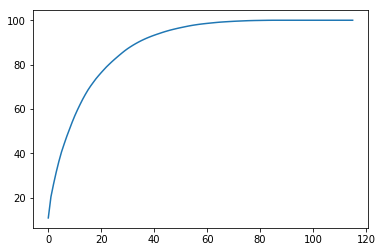

In [64]:
from sklearn.decomposition import PCA

# Converting data to numpy array
X = emp_data.values

# Data has 116 variables so no of components of PCA = 116
pca = PCA(n_components=116)
pca.fit(X)

# The amount of variance
var= pca.explained_variance_ratio_

# Cumulative Variance 
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [65]:
# From the above plot selecting 50 components since it explains almost 95+ % data 
pca = PCA(n_components=50)

# Fitting the selected components to the data
pca.fit(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2)

# Decision Tree For Regression

In [66]:
# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# predicting the train data 
pred_train = fit_DT.predict(X_train)
#error metrics for train data
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# predicting the test data
pred_test = fit_DT.predict(X_test)
#error metrics for test data
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
#print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 3.1771204893741425
Root Mean Squared Error For Test data = 3.0075240959904663


# Random Forest

In [67]:
# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# predicting the train data
pred_train = fit_RF.predict(X_train)
#error metrics for train data
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

#predicting the test data
pred_test = fit_RF.predict(X_test)
#error metrics for test data
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))

Root Mean Squared Error For Training data = 1.1367853516710889
Root Mean Squared Error For Test data = 2.5035149809146366


# Linear Regression

In [68]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train ,y_train)

#predicting the train data
pred_train = fit_LR.predict(X_train)
#error metrics for train data
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# predicting the test data
pred_test = fit_LR.predict(X_test)
#error metrics for test data
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))

Root Mean Squared Error For Training data = 2.4131927144179905
Root Mean Squared Error For Test data = 2178285093812.4648
